In [27]:
import tensorflow as tf

from tensorflow import keras

from keras.models import Sequential

from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Embedding

from keras.utils import to_categorical

import numpy as np

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight') #The stylesheet for plotting. There are different types

In [28]:
#Loading the Data
from keras.datasets import cifar10

(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [29]:
#Checking shape of train and test sets

print('x_train shape:', x_train.shape)

print('y_train shape', y_train.shape)

print('x_test shape:', x_test.shape)

print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


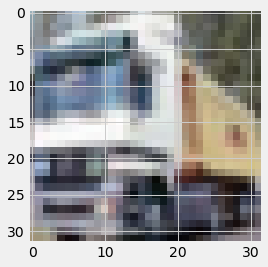

In [30]:
img = plt.imshow(x_train[1])

In [31]:
#One hot encoding y train and y test

y_train_oh = to_categorical(y_train)

y_test_oh = to_categorical(y_test)

In [32]:
#Normalizing the x_train and test DS

#diving the elements of dataset by 255 as the maximum value of a pixel is 255. Hence the values are scaled down to (0,1)

x_train = x_train/255

x_test = x_test/255

In [33]:
model = Sequential()

model.add(Conv2D(32,(5,5), activation='relu', input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])




In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1601000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)             

In [35]:
hist = model.fit(x_train, y_train_oh, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 48s 308ms/step - loss: 1.7928 - accuracy: 0.3252 - val_loss: 1.5027 - val_accuracy: 0.4594
Epoch 2/10
157/157 [==============================] - 39s 249ms/step - loss: 1.3989 - accuracy: 0.4882 - val_loss: 1.2713 - val_accuracy: 0.5421
Epoch 3/10
157/157 [==============================] - 37s 237ms/step - loss: 1.2373 - accuracy: 0.5539 - val_loss: 1.1271 - val_accuracy: 0.5969
Epoch 4/10
157/157 [==============================] - 38s 245ms/step - loss: 1.1086 - accuracy: 0.6046 - val_loss: 1.0611 - val_accuracy: 0.6205
Epoch 5/10
157/157 [==============================] - 38s 244ms/step - loss: 1.0166 - accuracy: 0.6385 - val_loss: 0.9891 - val_accuracy: 0.6516
Epoch 6/10
157/157 [==============================] - 38s 241ms/step - loss: 0.9386 - accuracy: 0.6665 - val_loss: 0.9205 - val_accuracy: 0.6770
Epoch 7/10
157/157 [==============================] - 41s 263ms/step - loss: 0.8742 - accuracy: 0.6897 - val_loss: 0.9096 - val_ac

In [36]:
model.evaluate(x_test, y_test_oh)[1]

313/313 [==============================] - 4s 13ms/step - loss: 0.9484 - accuracy: 0.6685


0.6685000061988831

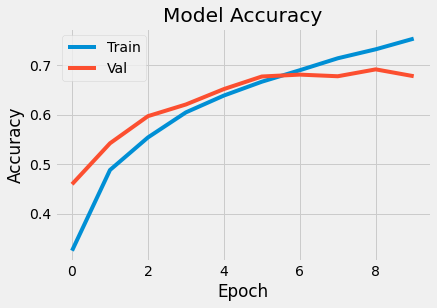

In [37]:
#Visualize the model accuracy

plt.plot(hist.history['accuracy'])

plt.plot(hist.history['val_accuracy'])

plt.title('Model Accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend(['Train', 'Val'], loc='upper left')
            
plt.show()


In [38]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0